In [15]:

import os
import time
import tushare as ts
import pandas as pd
import numpy as np

pro = ts.pro_api("d94b8d1af9f3110dca7acf2e85b4bf10b7d33de74491de8f671c4b8b")


class GetDatafromTushare():

    def __init__(self):
        self.pro = ts.pro_api("d94b8d1af9f3110dca7acf2e85b4bf10b7d33de74491de8f671c4b8b")

    def get_all_stocks(self):
        """
        得到所有股票的行情
        :return:
        """
        data = self.pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')
        # 选出上市时间在2019-03-31之前的股票
        stocks_data = data[data.list_date<'20190331']
        # stocks_data = stocks_data.loc[0:200]   # 这句只是为了测试，后面需要删掉
        return stocks_data

    def get_market_trading_days(self,startdate,enddate):
        """
        取交易所交易的日期
        :param startdate: 开始日期
        :param enddate: 结束日期
        :return:
        """
        tradedate_df = self.pro.trade_cal(exchange='', start_date=startdate, end_date=enddate, is_open=1)
        trading_days = tradedate_df.cal_date.tolist()
        return trading_days
    def get_all_daily(self):
        all_daily = self.pro.daily()
        return all_daily
    
    def get_all_index(self):
        all_index = self.pro.index_basic(market='CSI')
        return all_index
    
    def get_index_daily(self):
        index_daily = self.pro.index_daily(ts_code='000171.CSI')
        return index_daily
    
    def get_realtime_quotes(self):
        realtime_quotes = ts.get_realtime_quotes('000581') #Single stock symbol
        return realtime_quotes

obj = GetDatafromTushare()

In [16]:

data = obj.get_index_daily()
data["pct_chg_log"] = np.log(data["pct_chg"])
data["vol_log"] = np.log(data["vol"])
data = data.iloc[:30,:]


/home/hunk/miniconda2/envs/py37/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


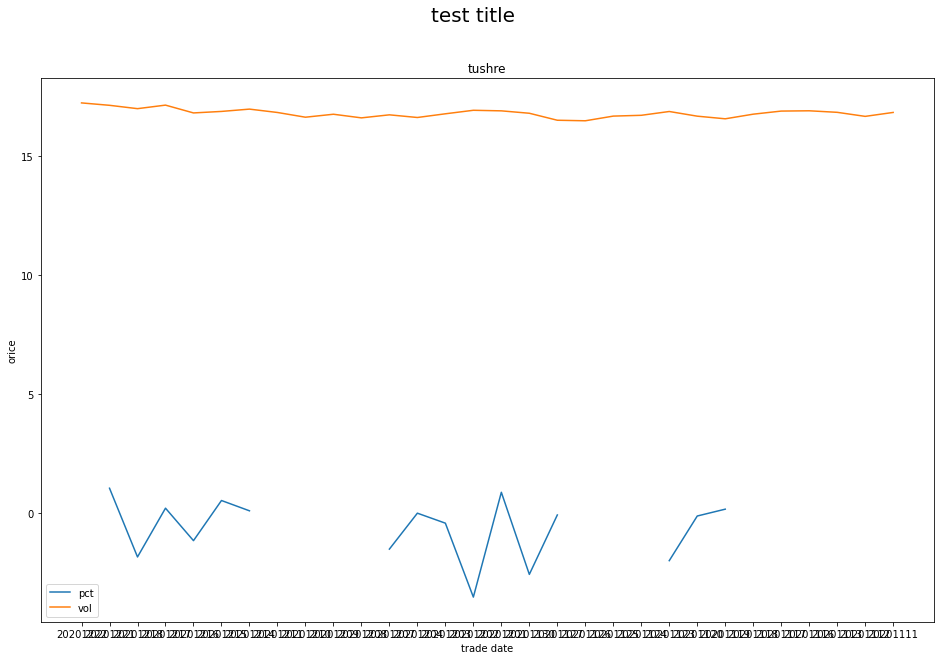

In [17]:

import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.suptitle('test title', fontsize=20)
plt.title('tushre')
plt.xlabel('trade date')
plt.ylabel('orice')
plt.plot(data['trade_date'], data['pct_chg_log'], label='pct')
plt.plot(data['trade_date'], data['vol_log'], label='vol')
plt.legend()
plt.show()



In [18]:
# 获取实时行情，20201222可用
data1 = obj.get_realtime_quotes()
data1

,name,open,pre_close,price,high,low,bid,ask,volume,amount,...,a2_p,a3_v,a3_p,a4_v,a4_p,a5_v,a5_p,date,time,code
0,威孚高科,23.950,24.040,23.150,23.950,23.080,23.150,23.160,9294193,218125600.440,...,23.170,45,23.180,120,23.190,29,23.200,2020-12-22,15:00:03,000581


In [19]:
all_fund = pro.fund_basic(market='E')
all_fund

,ts_code,name,management,custodian,fund_type,found_date,due_date,list_date,issue_date,delist_date,...,min_amount,exp_return,benchmark,status,invest_type,type,trustee,purc_startdate,redm_startdate,market
0,513300.SH,纳斯达克ETF,华夏基金,中国工商银行,股票型,20201022,None,20201105,20201014,None,...,0.1,None,估值汇率调整后的纳斯达克100指数收益,L,被动指数型,契约型开放式,None,20201105,20201105,E
1,159821.SZ,BOCI创业,中银证券,中国工商银行,股票型,20200929,None,20201029,20200914,None,...,0.1,None,创业板指数收益率,L,被动指数型,契约型开放式,None,20201029,20201029,E
2,159822.SZ,新经济,银华基金,中国工商银行,股票型,20200929,None,20201023,20200911,None,...,0.1,None,标普中国新经济行业(A股上限)指数收益率,L,被动指数型,契约型开放式,None,20201023,20201023,E
3,588090.SH,科创板ETF,华泰柏瑞基金,中国建设银行,股票型,20200928,None,20201116,20200922,None,...,0.1,None,上证科创板50成份指数收益率,L,被动指数型,契约型开放式,None,20201116,20201116,E
4,511000.SH,长三角地方债ETF,招商基金,浙商银行,债券型,20200928,None,20201029,20200622,None,...,0.1,None,中债-0-3年长三角地方政府债指数收益率,L,被动指数型,契约型开放式,None,20201029,20201029,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,500019.SH,基金普润,鹏华基金,中国工商银行,股票型,19920509,20070424,20010904,None,20070425,...,NaN,None,None,D,成长型,契约型封闭式,None,20010904,None,E
1194,500013.SH,基金安瑞,华安基金,中国工商银行,股票型,19920429,20070409,20010830,None,20070410,...,NaN,None,None,D,成长型,契约型封闭式,None,20010830,None,E
1195,500017.SH,基金景业,大成基金,中国农业银行,股票型,19920401,20070115,20011219,None,20070116,...,NaN,None,None,D,成长型,契约型封闭式,None,20011219,None,E
1196,184702.SZ,基金同智,长盛基金,中国银行,股票型,19920313,20070104,20000515,None,20070105,...,NaN,None,None,D,成长型,契约型封闭式,None,20000515,None,E


In [20]:
fund_mamager = pro.fund_manager(ts_code='150018.SZ,150008.SZ')
fund_mamager

,ts_code,ann_date,name,gender,birth_year,edu,nationality,begin_date,end_date,resume
0,150008.SZ,20200827,殷瑞飞,M,None,博士,中国,20130926,20200827,厦门大学统计学博士。曾任职于汇添富基金管理公司金融工程部。2011年6月加入国投瑞银基金管理...
1,150008.SZ,20110817,熊志勇,M,None,博士,中国,20101127,20110817,英国考文垂大学博士研究生。曾任职于天狮投资中心、华安基金管理有限公司，从事量化分析和证券研究...
2,150008.SZ,20200827,赵建,M,None,博士,中国,20191029,20200827,同济大学管理学博士。曾任上海博弘投资有限公司、上海数君投资有限公司高级软件工程师、风控经理，...
3,150008.SZ,20150210,路荣强,M,None,硕士,澳大利亚,20091014,20150210,量化投资组总监，澳大利亚籍，澳大利亚新南威尔士大学基金管理专业硕士。2000年3月至2001...
4,150018.SZ,20100508,周毅,M,None,硕士,美国,20100507,None,CFA，硕士学位；毕业于北京大学，美国南卡罗莱纳大学，美国约翰霍普金斯大学。曾任美国普华永道...
5,150018.SZ,20190831,张凯,M,None,硕士,中国,20190829,None,CFA，硕士学位，毕业于清华大学。2009年7月加盟银华基金管理有限公司，从事量化策略研发和...
6,150018.SZ,20100927,路志刚,M,1969,博士,中国,20100507,20100927,暨南大学金融学博士。曾任广东建设实业集团公司财务主管，广州证券有限公司发行部、营业部经理，金...
